In [39]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [21]:
fair_df = pd.read_csv('../fairness_df.csv', index_col = [0,1])
fair_df = fair_df.reset_index()

In [33]:
ranked = []
for dataset in np.unique(fair_df['level_0']):
    data_df = fair_df[fair_df['level_0'] == dataset]
    ranked.append(pd.concat([data_df[['level_0', 'level_1']], data_df.rank(numeric_only=True)], axis = 1))

Adult Data Set (Census)


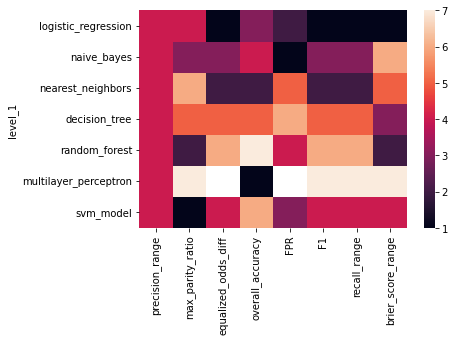

Communities and Crime


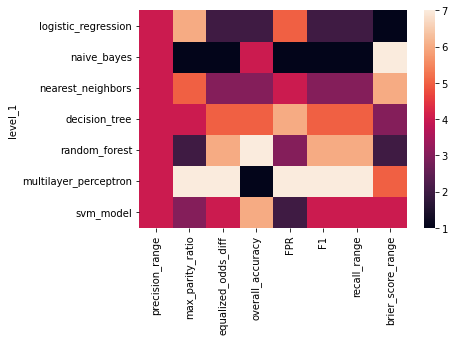

Diabetes Dataset 1999-2008


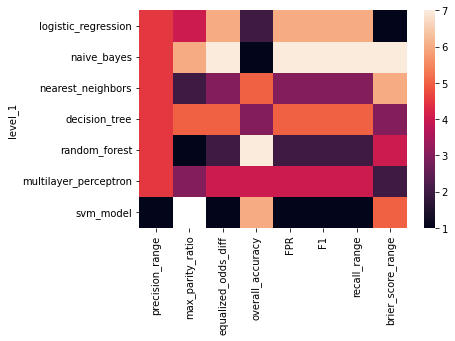

Loans Default Dataset


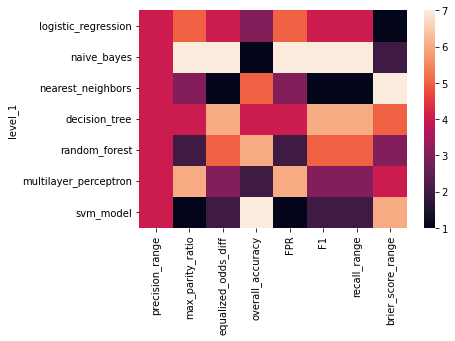

Obermeyer Health Dataset


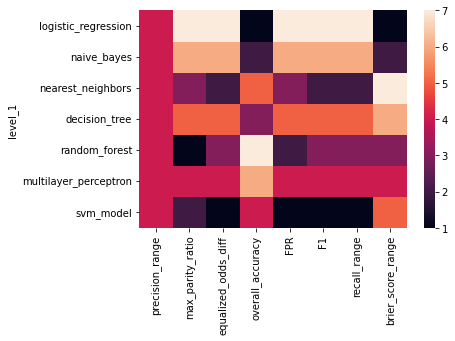

In [42]:
# Visualize ranks
for rank_df in ranked:
    dataset = rank_df['level_0'].iloc[0]
    rank_df = rank_df.drop(columns = ['level_0']).set_index('level_1')
    seaborn.heatmap(rank_df)
    print(dataset)
    plt.show()

In [53]:
# Average model rank within a dataset across metrics
for rank_df in ranked:
    dataset = rank_df['level_0'].iloc[0]
    rank_df = rank_df.drop(columns = ['level_0']).set_index('level_1')
    print('\n\n', dataset)
    print(rank_df.mean(axis = 1))



 Adult Data Set (Census)
level_1
logistic_regression      2.125
naive_bayes              3.375
nearest_neighbors        3.500
decision_tree            4.750
random_forest            4.625
multilayer_perceptron    5.500
svm_model                3.750
dtype: float64


 Communities and Crime
level_1
logistic_regression      3.000
naive_bayes              2.500
nearest_neighbors        3.875
decision_tree            4.625
random_forest            4.500
multilayer_perceptron    5.625
svm_model                3.875
dtype: float64


 Diabetes Dataset 1999-2008
level_1
logistic_regression      4.437500
naive_bayes              5.812500
nearest_neighbors        3.687500
decision_tree            4.437500
random_forest            3.062500
multilayer_perceptron    3.687500
svm_model                2.285714
dtype: float64


 Loans Default Dataset
level_1
logistic_regression      3.750
naive_bayes              5.250
nearest_neighbors        3.125
decision_tree            4.875
random_forest       

In [60]:
# for each model, average of average metric ranks across datasets
full_rank_df = pd.concat(ranked, axis = 0)
full_rank_df.groupby(['level_1']).mean().mean(axis = 1)

level_1
decision_tree            4.68750
logistic_regression      3.68750
multilayer_perceptron    4.55625
naive_bayes              4.33750
nearest_neighbors        3.53750
random_forest            3.88750
svm_model                3.06875
dtype: float64

In [61]:
full_rank_df

,level_0,level_1,precision_range,max_parity_ratio,equalized_odds_diff,overall_accuracy,FPR,F1,recall_range,brier_score_range
0,Adult Data Set (Census),logistic_regression,4.0,4.0,1.0,3.0,2.0,1.0,1.0,1.0
1,Adult Data Set (Census),naive_bayes,4.0,3.0,3.0,4.0,1.0,3.0,3.0,6.0
2,Adult Data Set (Census),nearest_neighbors,4.0,6.0,2.0,2.0,5.0,2.0,2.0,5.0
3,Adult Data Set (Census),decision_tree,4.0,5.0,5.0,5.0,6.0,5.0,5.0,3.0
4,Adult Data Set (Census),random_forest,4.0,2.0,6.0,7.0,4.0,6.0,6.0,2.0
5,Adult Data Set (Census),multilayer_perceptron,4.0,7.0,NaN,1.0,NaN,7.0,7.0,7.0
6,Adult Data Set (Census),svm_model,4.0,1.0,4.0,6.0,3.0,4.0,4.0,4.0
7,Communities and Crime,logistic_regression,4.0,6.0,2.0,2.0,5.0,2.0,2.0,1.0
8,Communities and Crime,naive_bayes,4.0,1.0,1.0,4.0,1.0,1.0,1.0,7.0
9,Communities and Crime,nearest_neighbors,4.0,5.0,3.0,3.0,4.0,3.0,3.0,6.0
